# Sentiment

Description: We will now extract out the Sentiment for each Genre using the Lexicon provides to us in Class.

### Output

1. SENTIMENT.csv

In [1]:
import os
import csv
import pandas as pd
import re
import nltk
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh as eig
import plotly_express as px
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from gensim.models import word2vec
from sklearn.manifold import TSNE
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.rcParams["figure.figsize"] = (14, 10)

<Figure size 640x480 with 0 Axes>

In [2]:
TFIDF_file = "TFIDF.csv"
TOKEN_file = "TOKEN.csv"
VOCAB_file = "VOCAB.csv"
TFIDF = pd.read_csv(TFIDF_file).set_index(["Genre","Artist","SName","Language"])
TOKEN = pd.read_csv(TOKEN_file)
VOCAB = pd.read_csv(VOCAB_file)

In [3]:
OHCO = ['Genre', 'Artist',  'SName','Language', 'sent_num', 'token_num']
LANG = OHCO[:4]
SONG = OHCO[:3]
ARTIST = OHCO[:2]
GENRE = OHCO[:1]

In [4]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

In [5]:
salex = pd.read_csv('C:\\Users\\Grant\\Desktop\\TA_PROJECT\\salex_nrc.csv')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative

In [6]:
TOKEN_SENTIMENT = TOKEN
TOKEN_SENTIMENT = TOKEN_SENTIMENT.merge(salex, on='term_str', how='left')
TOKEN_SENTIMENT[emo_cols] = TOKEN_SENTIMENT[emo_cols].fillna(0)

In [7]:
TOKEN_SENTIMENT

,Genre,Artist,SName,Language,sent_num,token_num,pos_tuple,pos,token_str,term_str,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
0,Funk Carioca,Marcos e Fernando,Papo de Jacaré,PORTUGUESE,0,0,"('Im', 'NNP')",NNP,Im,im,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,Funk Carioca,Marcos e Fernando,Papo de Jacaré,PORTUGUESE,0,1,"('riding', 'VBG')",VBG,riding,riding,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,Funk Carioca,Marcos e Fernando,Papo de Jacaré,PORTUGUESE,0,2,"('this', 'DT')",DT,this,this,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,Funk Carioca,Marcos e Fernando,Papo de Jacaré,PORTUGUESE,0,3,"('girls', 'NNS')",NNS,girls,girls,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,Funk Carioca,Marcos e Fernando,Papo de Jacaré,PORTUGUESE,0,4,"('wave', 'VBP')",VBP,wave,wave,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727166,Sertanejo,Jayne,Potranca Selvagem,PORTUGUESE,22,3,"('loop', 'NN')",NN,loop,loop,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
727167,Sertanejo,Jayne,Potranca Selvagem,PORTUGUESE,23,0,"('that', 'DT')",DT,that,that,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
727168,Sertanejo,Jayne,Potranca Selvagem,PORTUGUESE,23,1,"('binds', 'VBZ')",VBZ,binds,binds,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
727169,Sertanejo,Jayne,Potranca Selvagem,PORTUGUESE,23,2,"('the', 'DT')",DT,the,the,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [8]:

TOKEN_WB = TOKEN.reset_index()
HipHop_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Hip Hop"]
Sertanejo_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Sertanejo"]
Rock_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Rock"]
FunkCarioca_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Funk Carioca"]
Pop_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Pop"]
Samba_TOKEN = TOKEN_WB[TOKEN_WB["Genre"] == "Samba"]

In [9]:
HipHop_SENTIMENT = HipHop_TOKEN.merge(salex, on='term_str', how='left')
Sertanejo_SENTIMENT  = Sertanejo_TOKEN.merge(salex, on='term_str', how='left')
Rock_SENTIMENT  = Rock_TOKEN.merge(salex, on='term_str', how='left')
FunkCarioca_SENTIMENT  = FunkCarioca_TOKEN.merge(salex, on='term_str', how='left')
Pop_SENTIMENT  = Pop_TOKEN.merge(salex, on='term_str', how='left')
Samba_SENTIMENT  = Samba_TOKEN.merge(salex, on='term_str', how='left')

In [10]:
def Flip_Negative_Emotions(number,condition):
    if condition in ["anger", "disgust", "fear", "sadness"]:
        number = number*-1 
    else:
        number
    return number

In [11]:
Hip_Hop_Aggregation = pd.DataFrame(HipHop_SENTIMENT[emo_cols].mean()).reset_index()
Hip_Hop_Aggregation = Hip_Hop_Aggregation.rename(columns={'index': 'Emotion'})
Hip_Hop_Aggregation = Hip_Hop_Aggregation.rename(columns={0: 'Total'})
Hip_Hop_Aggregation['Genre'] = 'Hip Hop'

Sertanejo_Aggregation = pd.DataFrame(Sertanejo_SENTIMENT[emo_cols].mean()).reset_index()
Sertanejo_Aggregation = Sertanejo_Aggregation.rename(columns={'index': 'Emotion'})
Sertanejo_Aggregation = Sertanejo_Aggregation.rename(columns={0: 'Total'})
Sertanejo_Aggregation['Genre'] = 'Sertanejo'

Rock_Aggregation = pd.DataFrame(Rock_SENTIMENT[emo_cols].mean()).reset_index()
Rock_Aggregation = Rock_Aggregation.rename(columns={'index': 'Emotion'})
Rock_Aggregation = Rock_Aggregation.rename(columns={0: 'Total'})
Rock_Aggregation['Genre'] = 'Rock'

FunkCarioca_Aggregation = pd.DataFrame(FunkCarioca_SENTIMENT[emo_cols].mean()).reset_index()
FunkCarioca_Aggregation = FunkCarioca_Aggregation.rename(columns={'index': 'Emotion'})
FunkCarioca_Aggregation = FunkCarioca_Aggregation.rename(columns={0: 'Total'})
FunkCarioca_Aggregation['Genre'] = 'FunkCarioca'

Pop_Aggregation = pd.DataFrame(Pop_SENTIMENT[emo_cols].mean()).reset_index()
Pop_Aggregation = Pop_Aggregation.rename(columns={'index': 'Emotion'})
Pop_Aggregation = Pop_Aggregation.rename(columns={0: 'Total'})
Pop_Aggregation['Genre'] = 'Pop'

Samba_Aggregation = pd.DataFrame(Samba_SENTIMENT[emo_cols].mean()).reset_index()
Samba_Aggregation = Samba_Aggregation.rename(columns={'index': 'Emotion'})
Samba_Aggregation = Samba_Aggregation.rename(columns={0: 'Total'})
Samba_Aggregation['Genre'] = 'Samba'


Complete_Sentiment_Dataset = Hip_Hop_Aggregation.append(Sertanejo_Aggregation)
Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.append(Rock_Aggregation)
Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.append(FunkCarioca_Aggregation)
Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.append(Pop_Aggregation)
Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.append(Samba_Aggregation)

Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.reset_index()



Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.pivot("Emotion", "Genre", "Total")



Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.reindex(["anger", "disgust", "fear", "sadness", "anticipation", "surprise","trust", "joy", "polarity" ])
Complete_Sentiment_Dataset = Complete_Sentiment_Dataset[["Hip Hop", "Rock", "FunkCarioca", "Samba", "Sertanejo", "Pop"  ]]


Complete_Sentiment_Dataset = Complete_Sentiment_Dataset.reindex(["anger", "disgust", "fear", "sadness", "anticipation", "surprise","trust", "joy", "polarity" ])

PolaritySentiment = Complete_Sentiment_Dataset.tail(1)
Complete_Sentiment_Dataset.drop(Complete_Sentiment_Dataset.tail(1).index,inplace=True)

In [12]:
Complete_Sentiment_Dataset
#Index(['Hip Hop', 'Rock', 'FunkCarioca', 'Samba', 'Sertanejo', 'Pop'], dtype='object', name='Genre')

Genre,Hip Hop,Rock,FunkCarioca,Samba,Sertanejo,Pop
Emotion,,,,,,
anger,0.327794,0.236807,0.252671,0.201816,0.198514,0.195442
disgust,0.226991,0.162281,0.171801,0.144154,0.143024,0.133470
fear,0.339360,0.320447,0.286335,0.259478,0.271774,0.255245
sadness,0.321889,0.341908,0.320248,0.311246,0.326537,0.285266
anticipation,0.245435,0.267235,0.278385,0.296751,0.287504,0.249457
surprise,0.172693,0.171983,0.154658,0.178401,0.159627,0.168917
trust,0.302045,0.312362,0.342484,0.357598,0.339645,0.304316
joy,0.369735,0.409525,0.426460,0.507646,0.500291,0.512177


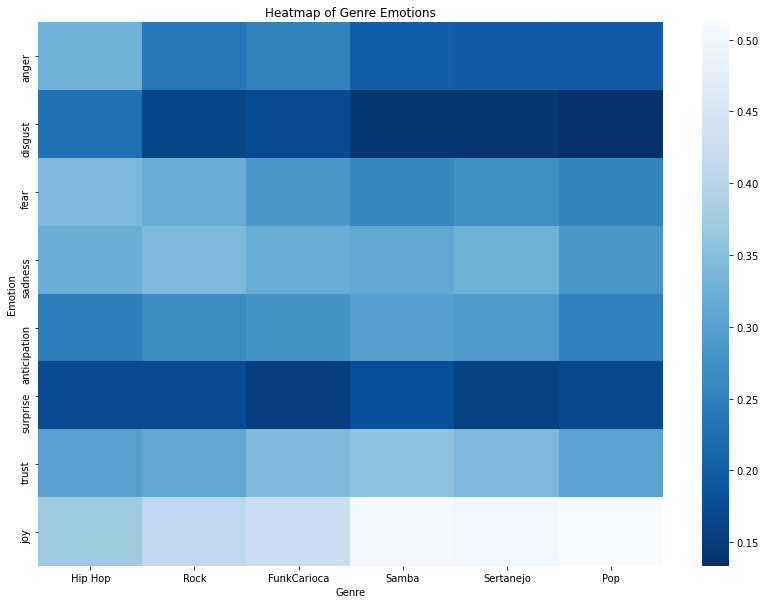

In [13]:
cmap = sns.cm.rocket_r
ax = sns.heatmap(Complete_Sentiment_Dataset,cmap="Blues_r" )
plt.title("Heatmap of Genre Emotions")
plt.show()

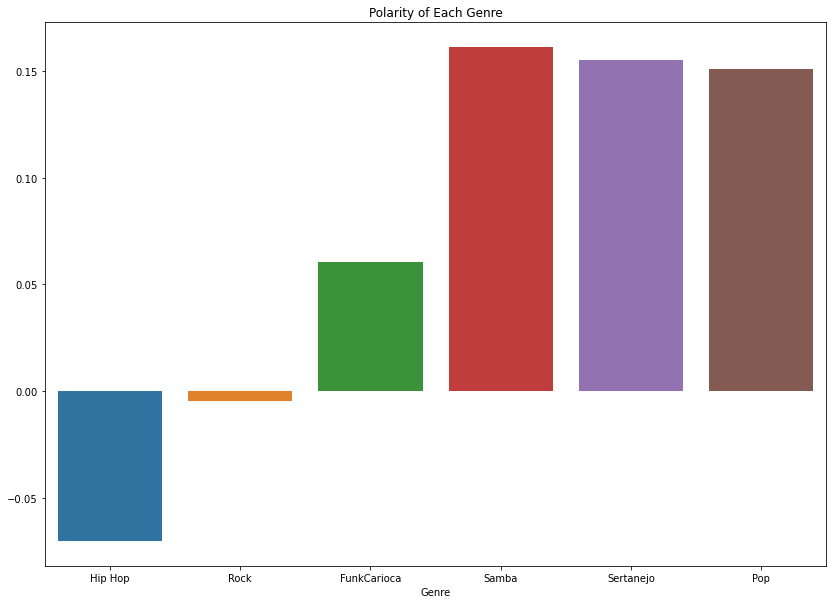

In [14]:
cmap = sns.cm.rocket_r
ax = sns.barplot(data=PolaritySentiment)
plt.title("Polarity of Each Genre")
plt.show()

In [15]:
PolaritySentiment

Genre,Hip Hop,Rock,FunkCarioca,Samba,Sertanejo,Pop
Emotion,,,,,,
polarity,-0.070429,-0.004851,0.060373,0.161357,0.155403,0.151194


In [16]:
TOKEN_SENTIMENT.to_csv("SENTIMENT.csv")